# Generate Geometry

## Weird Geometry Generation using nanomesh

<Axes: title={'center': 'triangle mesh'}>

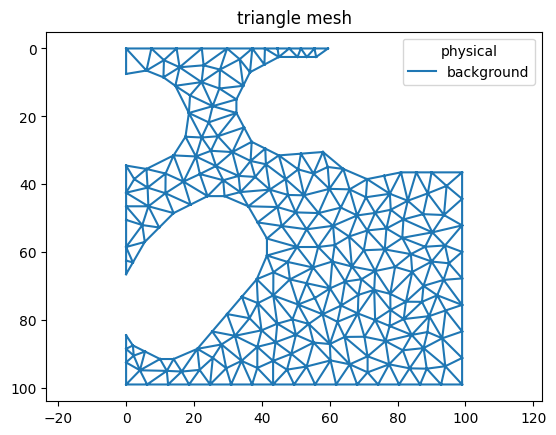

In [15]:
# !pip3 install scikit-image
from skimage.morphology import disk
# !pip3 install nanomesh
from nanomesh.data import binary_blobs2d

# Data must be normalized before using it in FEM
data = binary_blobs2d(length=100, volume_fraction=0.4)

from nanomesh import Mesher

mesher = Mesher(data)
mesher.generate_contour(max_edge_dist=10, precision=1)
mesh = mesher.triangulate(opts='q30a25')

triangles = mesh.get('triangle')
triangles.remove_cells(label=2, key='physical')

triangles.plot()

In [16]:
print(triangles)

TriangleMesh(
    points = (244, 2),
    cells = (390, 3),
    fields = ('X', 'background'),
    region_markers = (),
    cell_data = ('physical',),
)


In [17]:
print(triangles.points)

[[36.5        99.        ]
 [36.5        81.        ]
 [38.5        71.        ]
 [35.5        64.        ]
 [30.5        58.        ]
 [31.5        45.        ]
 [27.5        37.        ]
 [19.         32.5       ]
 [15.         32.5       ]
 [ 7.         36.5       ]
 [ 2.5        45.        ]
 [ 2.5        56.        ]
 [ 0.         59.5       ]
 [ 7.5         0.        ]
 [ 6.5         6.        ]
 [ 8.5        11.        ]
 [11.         14.5       ]
 [19.         18.5       ]
 [26.         17.5       ]
 [31.5        14.        ]
 [35.5         6.        ]
 [34.5         0.        ]
 [66.5         0.        ]
 [57.          5.5       ]
 [48.5        14.        ]
 [43.5        24.        ]
 [43.5        29.        ]
 [46.5        36.        ]
 [56.         41.5       ]
 [61.         41.5       ]
 [68.         38.5       ]
 [78.25       29.75      ]
 [88.5        21.        ]
 [91.5        14.        ]
 [91.5        10.        ]
 [87.5         2.        ]
 [84.5         0.        ]
 

In [18]:
print(triangles.cells)

[[ 37  13  14]
 [ 10  50  46]
 [ 77  25  79]
 ...
 [203 208 242]
 [216 242 208]
 [225 243 217]]


In [19]:
help(triangles)

Help on TriangleMesh in module nanomesh.mesh._triangle object:

class TriangleMesh(nanomesh.mesh._mesh.Mesh, nanomesh.mesh._mixin.PruneZ0Mixin)
 |  TriangleMesh(points: 'np.ndarray', cells: 'np.ndarray', *args, **kwargs)
 |  
 |  Data class for triangle meshes.
 |  
 |  Depending on the number of dimensions of the cells, the appropriate
 |  subclass will be chosen if possible.
 |  
 |  Parameters
 |  ----------
 |  points : (m, 2 or 3) numpy.ndarray[float]
 |      Array with points.
 |  cells : (i, 3) numpy.ndarray[int]
 |      Index array describing the cells of the mesh.
 |  fields : Dict[str, int]:
 |      Mapping from field names to labels
 |  region_markers : RegionMarkerList, optional
 |      List of region markers used for assigning labels to regions.
 |      Defaults to an empty list.
 |  **cell_data
 |      Additional cell data. Argument must be a 1D numpy array
 |      matching the number of cells defined by `i`.
 |  
 |  Method resolution order:
 |      TriangleMesh
 |      

## Translate to FEMSolver

In [20]:
triangles.write('mesh1test.vol', 'netgen')